# **MNIST Handwritten Number Recognition using Keras**

### **Why MNIST?**
Handwritten number recognition project ~ ```Hello World``` of ML world:
- simplicity
- abundant data
- magical results

## **Step 1 — Import all the required libraries**

In [2]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Input, Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

## **Step 2 — Import training and testing data**

We can get `MNIST` dataset by `mnist` method included in `Keras`

In [2]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()
print('Train set:', train_X.shape)
print('Test set:', test_X.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train set: (60000, 28, 28)
Test set: (10000, 28, 28)


## **Step 3 — Visualize some of our 28x28 images**
Now, let's see some example of our dataset.

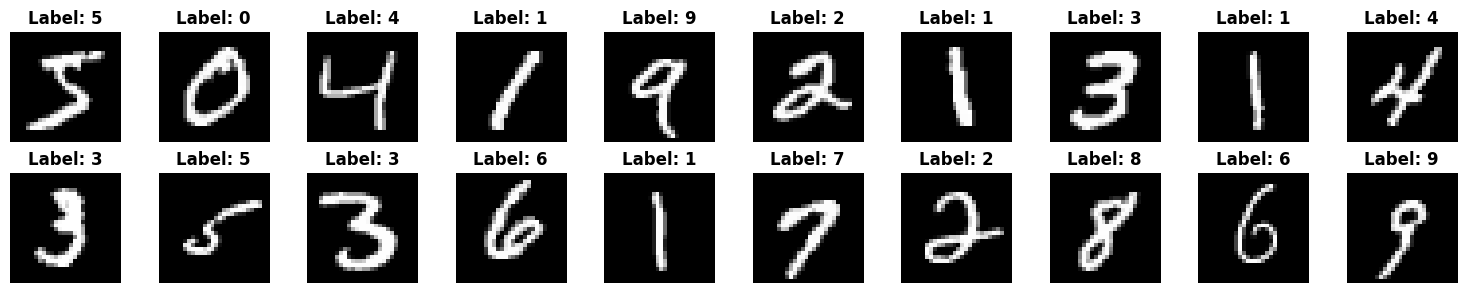

In [3]:

# Show the images
fig, axes = plt.subplots(2, 10, figsize=(15, 3))

for i in range(20):
    ax = axes[i // 10, i % 10]
    ax.imshow(train_X[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {train_y[i]}', fontweight = 'bold')

plt.tight_layout()
plt.show()


## **Step 4 — Preprocess our training and testing data**

Our input shape was `(60000,28,28)`, but Keras wants the data in `(60000,28,28,1)` format, that’s why we are reshaping it.

In [4]:
print('Before:', 'train', train_X.shape, 'test', test_X.shape)
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)
print('After:', 'train', train_X.shape, 'test', test_X.shape)

Before: train (60000, 28, 28) test (10000, 28, 28)
After: train (60000, 28, 28, 1) test (10000, 28, 28, 1)


We are converting the integer labels to floats, like the element at 1st index was 1 which is an int , now it will be 1.0 which is a float. Also, we need to normalize the value into the range `[0, 1]`

In [5]:
train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')
train_X = train_X / 255
test_X  = test_X / 255

We also need to `One Hot encode` the labels.

In [6]:
train_y = to_categorical(train_y)
test_y  = to_categorical(test_y)

## **Step 5 — Create our CNN model for MNIST Handwritten number recognition**

Let’s create a new `Sequential` model.

In [7]:
model = Sequential()

Then, we will add some hidden layers to the model

In [8]:
# Input layer
model.add(Input(shape=(28, 28, 1)))

# Convolutional layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='SAME'))
# Max pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution layer 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='SAME'))
# Max pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer, help us preventing Overfitting.
model.add(Dropout(0.25))

# Flatten the result.
model.add(Flatten())

# Dense layer
model.add(Dense(10,activation='softmax'))


Last layer with 10 neurons in it, with softmax activation. Softmax works best with multilabel classification. It will give highest probablity to that neuron which will be at index of the image provided. Like if the image provided is of 5, the output could be something like [0.001, 0.0003, 0.0, 0.0, 0.99, 0.008, 0.00065, 0.0, 0.0, 0.0]

Then, we will compile our model, with loss function is `cross entropy`, and the metric for evaluation here is `accuracy`.

In [9]:

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

## **Step 6 - Train our model for MNIST Handwritten number recognition**

Simply just train the model using model.fit

In [10]:
start_time = time.time()
batch_size=32
epochs=10

history_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

end_time = time.time()
print(f'CNN with Keras training time: {end_time - start_time}')

Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.5947 - accuracy: 0.8230 - val_loss: 0.2003 - val_accuracy: 0.9431
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1940 - accuracy: 0.9417 - val_loss: 0.1279 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1387 - accuracy: 0.9585 - val_loss: 0.0985 - val_accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1148 - accuracy: 0.9652 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0998 - accuracy: 0.9684 - val_loss: 0.0677 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0893 - accuracy: 0.9732 - val_loss: 0.0598 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0816 - accuracy: 0.9745 - val_loss: 0.0543 -

Use model.evaluate() to evaluate loss and accuracy

In [11]:
loss,accuracy = model.evaluate(test_X,test_y,verbose=0)

print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Test loss --->  5.01%
Test accuracy --->  98.35%


## **Step 7 — Plot the results for MNIST Handwritten number recognition model**

In history_dict we stored some data while using model.fit().

In [12]:
history_dict = history_data.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


So we can use the history attribute of that plotting_data to get a dictionary object which had loss and accuracy values stored in it while training.

In [13]:
test_loss = history_dict['val_loss']
training_loss = history_dict['loss']
test_accuracy = history_dict['val_accuracy']
training_accuracy = history_dict['accuracy']

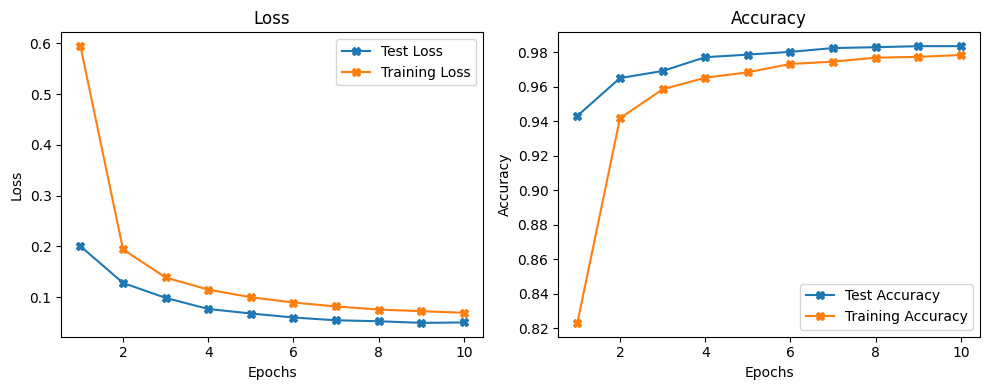

In [14]:
epochs = list(range(1,len(test_loss)+1))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot loss
axs[0].plot(epochs, test_loss, marker='X', label='Test Loss')
axs[0].plot(epochs, training_loss, marker='X', label='Training Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot accuracy
axs[1].plot(epochs, test_accuracy, marker='X', label='Test Accuracy')
axs[1].plot(epochs, training_accuracy, marker='X', label='Training Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Step 8 — Save our MNIST Handwritten number recognition model for future use

In [15]:
model.save('MNIST_10_epochs.keras')
print('Model saved.')

Model saved.


We can use the statement below to load the saved model anywhere and use it.

In [7]:
classifier = load_model('MNIST_10_epochs.keras')

## **Step 9 — Live predictions for MNIST Handwritten number recognition**

In [8]:
drawing = False
cv2.namedWindow('win')
cv2.resizeWindow("win", 700, 700)
black_image = np.zeros((256, 256, 3), np.uint8)
ix, iy = -1, -1

def draw_circles(event, x, y, flags, param):
    global ix, iy, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(black_image, (x,y), 5, (255,255,255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.setMouseCallback('win', draw_circles)

while True:
    cv2.imshow('win', black_image)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == 13:
        input_img = cv2.resize(black_image, (28,28))
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img = input_img.reshape(1, 28, 28, 1)

        predicted_array = classifier.predict(input_img, 1, verbose=0)[0]
        predicted_label = np.argmax(predicted_array)
        res = f"Predicted label: {predicted_label}"

        cv2.putText(
            black_image, text=str(res), org=(0,30),
            fontFace=cv2.FONT_ITALIC , fontScale=0.5,
            color=(255, 255, 255), thickness=1
        )

    elif key == ord('c'):
        black_image = np.zeros((256, 256, 3), np.uint8)
        ix, iy = -1, -1
cv2.destroyAllWindows()